In [1]:
import scanpy as sc
from sklearn.model_selection import train_test_split
from qiskit_machine_learning.utils import algorithm_globals

# Load the AnnData object
fname = 'Z:\selim_working_dir\PERCEPTION2_selim_custom\cancer_cell_lines.h5ad'
adata = sc.read_h5ad(fname) 
adata.X = adata.layers['counts'].copy()
adata

AnnData object with n_obs × n_vars = 56344 × 22337
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'CellLine', 'depmap_id', 'Tissue', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'n_counts', 'leiden'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'CellLine_colors', 'Tissue_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', '

In [4]:
import pandas as pd

# Path to your metadata file
fname_model = r'Z:\selim_working_dir\PERCEPTION2_selim_custom\Model.csv'

# Load the Cell Line metadata
Model = pd.read_csv(fname_model)

# Apply classification, considering only 'Non-Cancerous' as Non-Cancerous
Model['Classification'] = Model['OncotreePrimaryDisease'].apply(
    lambda x: 'Non-Cancerous' if str(x).strip().lower() == 'non-cancerous' else 'Cancer'
)

# Print the 'ModelID' and 'Classification' columns
print("\nFull Classified Dataset:")
print(Model[['ModelID', 'Classification']].head())  # Select specific columns

# Count the occurrences of each classification
classification_counts = Model['Classification'].value_counts()

# Print the classification counts
print("\nClassification Counts:")
print(classification_counts)





Full Classified Dataset:
      ModelID Classification
0  ACH-000001         Cancer
1  ACH-000002         Cancer
2  ACH-000003         Cancer
3  ACH-000004         Cancer
4  ACH-000005         Cancer

Classification Counts:
Classification
Cancer           1826
Non-Cancerous     133
Name: count, dtype: int64


In [5]:
import pandas as pd

# Ensure that the 'ModelID' in Model is the same as 'depmap_id' in adata.obs
# Create a mapping of 'ModelID' to 'Classification'
model_classification_map = Model.set_index('ModelID')['Classification'].to_dict()

# Use map() to assign the classification based on depmap_id
adata.obs['class'] = adata.obs['depmap_id'].map(model_classification_map)

# If there are any NaNs (missing matches), you can fill them with a default value like 'Unknown'
adata.obs['class'].fillna('Unknown', inplace=True)

# Check the result (First few rows)
print(adata.obs[['depmap_id', 'class']].head())

# Count the occurrences of each classification in 'class' column
classification_counts = adata.obs['class'].value_counts()

# Print the classification counts
print("\nClassification Counts in adata.obs['class']:")
print(classification_counts)


                        depmap_id   class
AAACCTGAGACATAAC-1-18  ACH-000785  Cancer
AAACCTGCACAACGCC-1-18  ACH-000163  Cancer
AAACCTGCAGACAAGC-1-18  ACH-000580  Cancer
AAACCTGCAGCTCGAC-1-18  ACH-000163  Cancer
AAACCTGCATGGATGG-1-18  ACH-000800  Cancer

Classification Counts in adata.obs['class']:
class
Cancer           51024
Unknown           5105
Non-Cancerous      215
Name: count, dtype: int64


C:\Users\ssromerogon\AppData\Local\Temp\ipykernel_32004\3431067375.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  adata.obs['class'].fillna('Unknown', inplace=True)


In [6]:
# Filter for 'Unknown' class
unknown_cell_lines = adata.obs[adata.obs['class'] == 'Unknown']

# Display the results
print(unknown_cell_lines[['depmap_id', 'class']].head())


                          depmap_id    class
ATGGGAGCAGCTGTAT-2-18  character(0)  Unknown
GCGAGAACACGGCCAT-2-18  character(0)  Unknown
AAAGCAATCAACACCA-9-9   character(0)  Unknown
AAATGCCAGGCCCTTG-9-9   character(0)  Unknown
AAATGCCCAGACGTAG-9-9   character(0)  Unknown


In [13]:
idx = adata.obs['Tissue'] == 'LUNG'
adata = adata[idx]
adata

View of AnnData object with n_obs × n_vars = 12504 × 22337
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'CellLine', 'depmap_id', 'Tissue', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'n_counts', 'leiden', 'class'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'CellLine_colors', 'Tissue_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'c

C:\Users\ssromerogon\AppData\Local\Temp\ipykernel_31316\2557703385.py:2: ImplicitModificationWarning: Setting element `.layers['counts']` of view, initializing view as actual.
  adata.layers["counts"] = adata.X.copy()


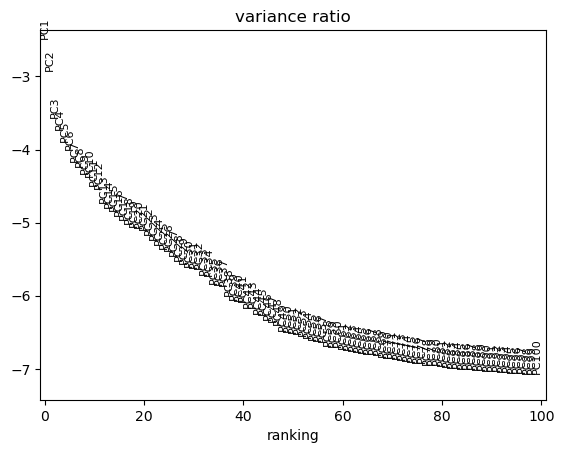

c:\Users\ssromerogon\.conda\envs\qnn-env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\ssromerogon\AppData\Local\Temp\ipykernel_31316\2557703385.py:12: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, flavor="leidenalg", n_iterations=2)


In [14]:
# Normalize and log-transform data
adata.layers["counts"] = adata.X.copy()
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=5000)
# UMAP process
npcs = 100
sc.tl.pca(adata, n_comps=npcs)
sc.pl.pca_variance_ratio(adata, n_pcs=npcs, log=True)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata, flavor="leidenalg", n_iterations=2)


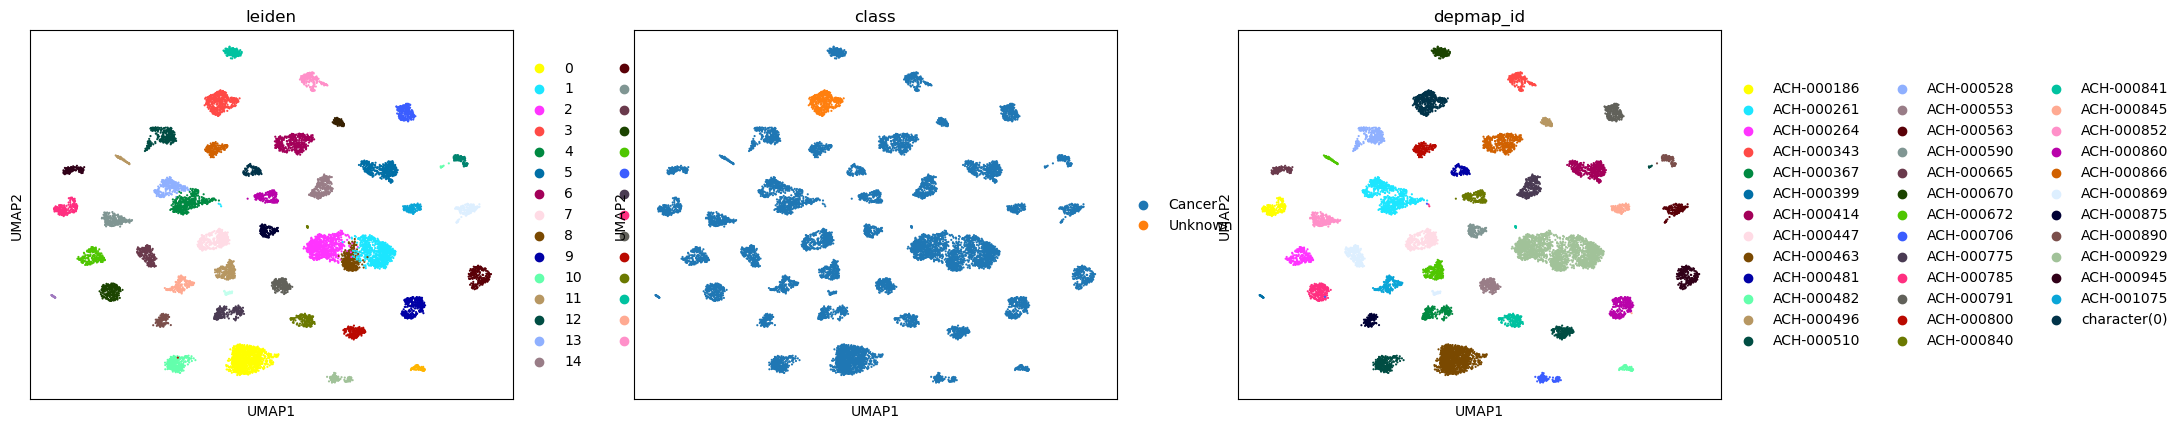

In [15]:
sc.pl.umap(adata, color=['leiden', 'class', 'depmap_id'])

In [57]:
# Oncogenic cancer genes
gene_list =np.array(['EGFR', 'KRAS', 'ALK', 'MET', 'HER2', 'MEK', 'TP53', 'STK11', 'PTEN', 'MYC'])
idx = np.isin(adata.var_names, gene_list) 
adata_sub = adata[:, idx]
adata_sub.X = adata_sub.layers['counts'].copy()
print(adata_sub.X.toarray())
adata_sub

[[0. 4. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 4. 0. ... 0. 0. 3.]
 [0. 5. 2. ... 2. 1. 0.]
 [0. 6. 1. ... 3. 0. 0.]]


View of AnnData object with n_obs × n_vars = 12504 × 8
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'CellLine', 'depmap_id', 'Tissue', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'n_counts', 'leiden'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'CellLine_colors', 'Tissue_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap', 'depmap_id_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    o

In [58]:
sc.pp.normalize_total(adata_sub, target_sum=1)
#sc.pp.log1p(adata_sub)

C:\Users\ssromerogon\AppData\Roaming\Python\Python311\site-packages\scanpy\preprocessing\_normalization.py:206: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
C:\Users\ssromerogon\AppData\Roaming\Python\Python311\site-packages\scanpy\preprocessing\_normalization.py:233: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))


In [77]:
# Set the random seed for reproducibility
algorithm_globals.random_seed = 42

# Split indices into training and testing
train_indices, test_indices = train_test_split(
    range(adata_sub.shape[0]), train_size=0.8, random_state=algorithm_globals.random_seed
)

# Subset AnnData using the indices
adata_train = adata_sub[train_indices].copy()
adata_test = adata_sub[test_indices].copy()

# Verify shapes and content
print(f"Training set shape: {adata_train.shape}")
print(f"Testing set shape: {adata_test.shape}")

Training set shape: (10003, 8)
Testing set shape: (2501, 8)


In [78]:
import numpy as np
print(np.min(adata_train.X), np.max(adata_train.X), np.mean(adata_train.X))
print(np.min(adata_test.X), np.max(adata_test.X), np.mean(adata_test.X))

0.0 1.0 0.120213956
0.0 1.0 0.12035186


In [79]:
# Classical solver
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

train_labels = adata_train.obs['depmap_id']
test_labels =  adata_test.obs['depmap_id']

Xtrain = adata_train.X.copy().toarray()
Xtest = adata_test.X.copy().toarray()

import numpy as np
print(np.min(Xtrain), np.max(Xtrain), np.mean(Xtest))
print(np.min(Xtest), np.max(Xtest), np.mean(Xtest))

0.0 1.0 0.12035186
0.0 1.0 0.12035186


In [81]:
import numpy as np

# Min-max scaling function with training stats
def minmax_scale_to_pi_train_test(data, train_min, train_max):
    scaled_data = (data - train_min) / (train_max - train_min)  # Scale to [0, 1]
    scaled_data = scaled_data - 0.5
    scaled_data = scaled_data * 3/2*np.pi
    return scaled_data

# Compute min and max from training data
train_min = np.min(Xtrain, axis=0)
train_max = np.max(Xtrain, axis=0)

# Scale training and test data
Xtrain = minmax_scale_to_pi_train_test(Xtrain, train_min, train_max)
Xtest = minmax_scale_to_pi_train_test(Xtest, train_min, train_max)

# Print to verify the range
print("Xtrain range:", np.min(Xtrain), "to", np.max(Xtrain))
print("Xtest range:", np.min(Xtest), "to", np.max(Xtest))

Xtrain range: -2.3561945 to 2.3561945
Xtest range: -2.3561945 to 2.3561945


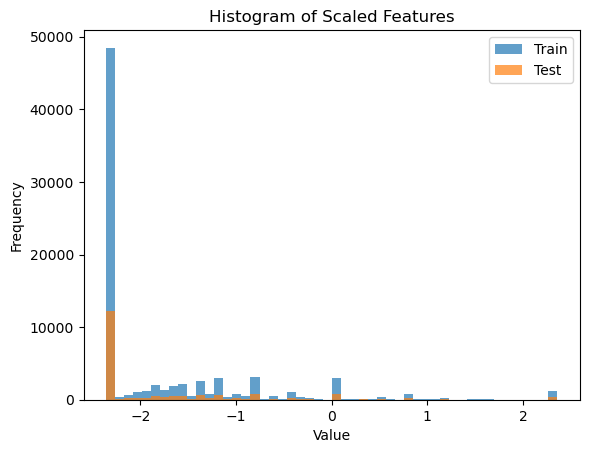

In [82]:
import matplotlib.pyplot as plt

plt.hist(Xtrain.flatten(), bins=50, alpha=0.7, label='Train')
plt.hist(Xtest.flatten(), bins=50, alpha=0.7, label='Test')
plt.title("Histogram of Scaled Features")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [83]:
svc = SVC()
_ = svc.fit(Xtrain, train_labels)  # suppress printing the return value
train_score_c4 = svc.score(Xtrain, train_labels)
test_score_c4 = svc.score(Xtest, test_labels)

print(f"Classical SVC on the training dataset: {train_score_c4:.2f}")
print(f"Classical SVC on the test dataset:     {test_score_c4:.2f}")

Classical SVC on the training dataset: 0.28
Classical SVC on the test dataset:     0.27


8
1


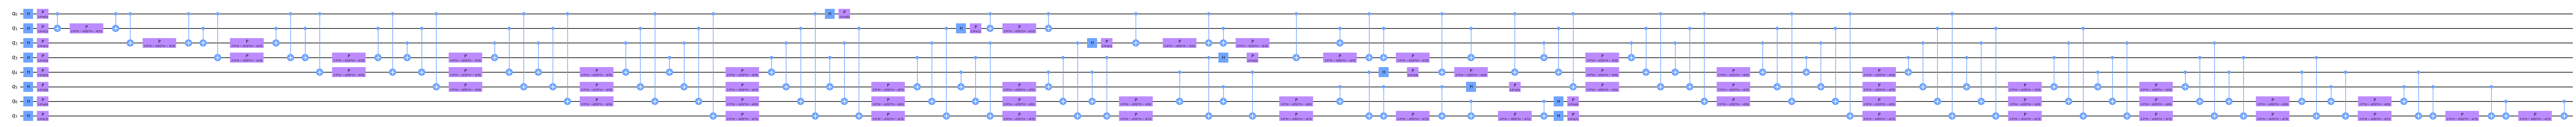

In [84]:
from qiskit.circuit.library import ZZFeatureMap

num_features = Xtrain.shape[1]

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=2)
print(feature_map.num_qubits)  # Should match num_features
print(feature_map.depth())     # Check depth for debugging

feature_map.decompose().draw(output="mpl", style="clifford", fold=1)

In [85]:
# Define ansatz
from qiskit.circuit.library import RealAmplitudes
ansatz = RealAmplitudes(num_qubits=num_features, reps=2)

#from qiskit.circuit.library import EfficientSU2
#ansatz = EfficientSU2(num_qubits=num_features, reps=3)

#from qiskit.circuit.library import QAOAAnsatz
#ansatz = QAOAAnsatz(num_qubits=num_features, reps=2)

In [86]:
from qiskit_machine_learning.optimizers import COBYLA
optimizer = COBYLA(maxiter=500, tol=1e-4)

#from qiskit_machine_learning.optimizers import SPSA
#optimizer = SPSA(maxiter=100, learning_rate=0.01, perturbation=0.1)

from qiskit.primitives import StatevectorSampler as Sampler
sampler = Sampler()


In [87]:
from matplotlib import pyplot as plt
from IPython.display import clear_output
from matplotlib.ticker import ScalarFormatter

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

def callback_graph(weights, obj_func_eval):
    from IPython.display import clear_output
    
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)

    plt.figure(figsize=(12, 6))
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    
    # Plot the objective function values
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    
    # Format the y-axis to show floating-point numbers
    ax = plt.gca()
    ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
    ax.yaxis.get_major_formatter().set_scientific(False)
    ax.ticklabel_format(useOffset=False)
    
    plt.show()


In [88]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

No gradient function provided, creating a gradient function. If your Sampler requires transpilation, please provide a pass manager.


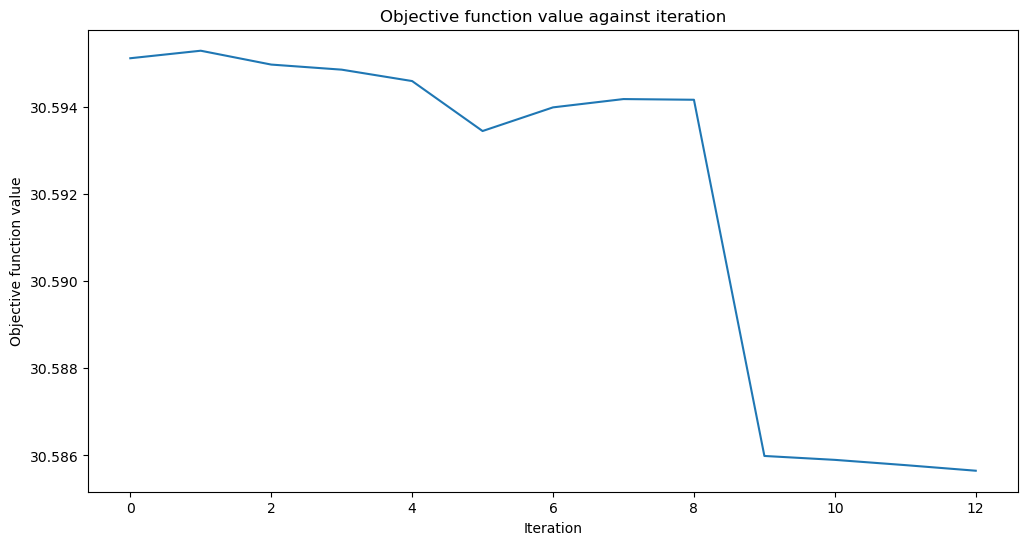

In [ ]:
import numpy as np


# Convert train and test labels to NumPy arrays
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

# Load the model
#vqc = VQC.load("vqc_checkpoint.model")
#vqc.warm_start = True  # Allow training continuation

start = time.time()
vqc.fit(Xtrain, train_labels)
elapsed = time.time() - start

#vqc.save("vqc_checkpoint.model")

print(f"Training time: {round(elapsed)} seconds")

# Final evaluation (optional)
train_score = vqc.score(Xtrain, train_labels)
print("Train score:", train_score)

test_score = vqc.score(Xtest, test_labels)
print("Test score:", test_score)
